In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D
from keras.initializers import random_uniform
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SS

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Dense,LSTM,Dropout,Flatten,BatchNormalization,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.optimizers import  SGD
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing import sequence
from keras.layers import SimpleRNN
#from hyperas.distributions import uniform

from keras.utils.np_utils import to_categorical
from keras import regularizers
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
# Saving all .csv files in folder to list.
path = r'...'  # use your path
files = [file for file in glob.glob(path + "**/*.csv", recursive=True)]

In [3]:
[print(f) for f in files]

/Users/ANDC/Desktop/Python\IDS2018\Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
/Users/ANDC/Desktop/Python\IDS2018\Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
/Users/ANDC/Desktop/Python\IDS2018\Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
/Users/ANDC/Desktop/Python\IDS2018\Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
/Users/ANDC/Desktop/Python\IDS2018\Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
/Users/ANDC/Desktop/Python\IDS2018\Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
/Users/ANDC/Desktop/Python\IDS2018\Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
/Users/ANDC/Desktop/Python\IDS2018\Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
/Users/ANDC/Desktop/Python\IDS2018\Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv


[None, None, None, None, None, None, None, None, None]

In [4]:
# Reading all the csv files into dataframes and putting thoose DFs to one list.

dataset = [pd.read_csv(f) for f in files]

c:\users\andc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
# Here we can see the number of rows and columns for each table.

for d in dataset:
    print(d.shape)

(1048575, 80)
(1048575, 80)
(1048575, 80)
(331125, 80)
(1048575, 80)
(1048575, 80)
(1048575, 80)
(1048575, 80)
(613104, 80)


In [6]:
# We already established that all tables have the same number of columns, but are they the same columns?
# This next piece of code loops over all given tables and compares each of them to all others.

for i in range(0,len(dataset)):
    if i != len(dataset)-1:
        same_columns = dataset[i].columns == dataset[i+1].columns
        
        if False in same_columns:
            print(i)
            break

same_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
# Combining all tables into one dataset. This is possilbe since all tables have the same columns,
# as we checked in the cell above.

dataset = pd.concat([d for d in dataset]).drop_duplicates(keep=False)
dataset.reset_index(drop=True, inplace = True)

In [8]:
# By checking the shape of dataset we can confirm that concatenation has been successfull.

dataset.shape

(7768601, 80)

### Preliminary data analysis

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7768601 entries, 0 to 7768600
Data columns (total 80 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Dst Port           object
 1   Protocol           object
 2   Timestamp          object
 3   Flow Duration      object
 4   Tot Fwd Pkts       object
 5   Tot Bwd Pkts       object
 6   TotLen Fwd Pkts    object
 7   TotLen Bwd Pkts    object
 8   Fwd Pkt Len Max    object
 9   Fwd Pkt Len Min    object
 10  Fwd Pkt Len Mean   object
 11  Fwd Pkt Len Std    object
 12  Bwd Pkt Len Max    object
 13  Bwd Pkt Len Min    object
 14  Bwd Pkt Len Mean   object
 15  Bwd Pkt Len Std    object
 16  Flow Byts/s        object
 17  Flow Pkts/s        object
 18  Flow IAT Mean      object
 19  Flow IAT Std       object
 20  Flow IAT Max       object
 21  Flow IAT Min       object
 22  Fwd IAT Tot        object
 23  Fwd IAT Mean       object
 24  Fwd IAT Std        object
 25  Fwd IAT Max        object
 26  Fwd IAT Min   

In [10]:
dataset.describe()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,7768601,7768601,7768601,7768601,7768601,7768601,7768601,7768601.0,7768601,7768601,...,7768601,7768601.0,7768601.0,7768601.0,7768601.0,7768601.0,7768601.0,7768601.0,7768601.0,7768601
unique,76049,6,232604,2593598,3979,3124,19310,67647.0,2817,496,...,20,543699.0,445204.0,463647.0,225302.0,715884.0,467337.0,528588.0,605943.0,14
top,80,6,16/02/2018 01:45:31,1,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
freq,1912204,5778959,7095,49634,2275093,2240254,2452767,2834924.0,2452767,5844698,...,4654885,6874551.0,7046242.0,6874551.0,6874551.0,6561192.0,6978370.0,6561192.0,6561192.0,6081065


In [11]:
dataset.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [13]:
dataset = dataset.drop(['Timestamp'], axis=1)
data_df['Label'].value_counts()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,141385,9,7,553,3773.0,202,0,61.444444,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,281,2,1,38,0.0,38,0,19.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,279824,11,15,1086,10527.0,385,0,98.727273,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,132,2,0,0,0.0,0,0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,274016,9,13,1285,6141.0,517,0,142.777778,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [14]:
dataset['Label'].value_counts()

Benign                      6081065
DDOS attack-HOIC             651746
DoS attacks-Hulk             412124
Bot                          278584
Infilteration                161864
SSH-Bruteforce               102782
DoS attacks-GoldenEye         41404
FTP-BruteForce                19740
DoS attacks-Slowloris         10010
DoS attacks-SlowHTTPTest       6624
DDOS attack-LOIC-UDP           1730
Brute Force -Web                611
Brute Force -XSS                230
SQL Injection                    87
Name: Label, dtype: int64

In [16]:
dataset = dataset.drop(['Protocol'], axis=1)

In [17]:
# Dataset conatains 15 labels.
#print(dataset[' Label'].unique())
#len(dataset[' Label'].unique())

print(dataset['Label'].unique())
len(dataset['Label'].unique())

['Benign' 'Bot' 'DoS attacks-SlowHTTPTest' 'DoS attacks-Hulk'
 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection' 'Infilteration'
 'DoS attacks-GoldenEye' 'DoS attacks-Slowloris' 'FTP-BruteForce'
 'SSH-Bruteforce' 'DDOS attack-LOIC-UDP' 'DDOS attack-HOIC']


14

In [19]:
# Saving cleaned dataset.

#dataset.to_csv("Dataset_clean.csv", index=False)

### Distribution of attacks

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = dataset['Label'].where(dataset['Label'] != "BENIGN")

c:\users\andc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Benign'),
  Text(1, 0, 'Bot'),
  Text(2, 0, 'DoS attacks-SlowHTTPTest'),
  Text(3, 0, 'DoS attacks-Hulk'),
  Text(4, 0, 'Brute Force -Web'),
  Text(5, 0, 'Brute Force -XSS'),
  Text(6, 0, 'SQL Injection'),
  Text(7, 0, 'Infilteration'),
  Text(8, 0, 'DoS attacks-GoldenEye'),
  Text(9, 0, 'DoS attacks-Slowloris'),
  Text(10, 0, 'FTP-BruteForce'),
  Text(11, 0, 'SSH-Bruteforce'),
  Text(12, 0, 'DDOS attack-LOIC-UDP'),
  Text(13, 0, 'DDOS attack-HOIC')])

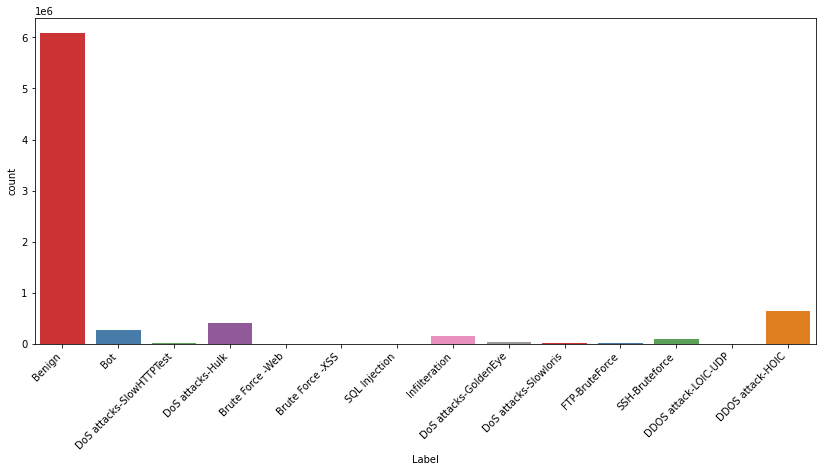

In [24]:
plt.figure(figsize=(14,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

In [25]:
# Saving all .csv files in folder to list.
path = r'/Users/ANDC/Desktop/Python'
files = [file for file in glob.glob(path + "**/*.csv", recursive=True)]

In [26]:
[print(f) for f in files]

/Users/ANDC/Desktop\Python\Dataset_clean.csv
/Users/ANDC/Desktop\Python\Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv


[None, None]

In [27]:
# Reading all the csv files into dataframes and putting thoose DFs to one list.

dataset = [pd.read_csv(f) for f in files]

In [28]:
# Here we can see the number of rows and columns for each table.

for d in dataset:
    print(d.shape)

(7768601, 78)
(7948748, 84)


In [29]:
# Concatenate all data into one DataFrame
dataset = pd.concat(dataset)
dataset.columns

Index(['Dst Port', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd

In [31]:
dataset = dataset.drop(['Timestamp', 'Flow ID'], axis=1)

In [32]:
dataset = dataset.drop(['Src IP', 'Dst IP'], axis=1)

In [33]:
dataset = dataset.drop(['Protocol', 'Src Port'], axis=1)

In [34]:
dataset.columns

Index(['Dst Port', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd

In [36]:
dataset['Label'].value_counts()

Benign                      13453622
DDOS attack-HOIC              651746
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              412124
Bot                           278584
Infilteration                 161864
SSH-Bruteforce                102782
DoS attacks-GoldenEye          41404
FTP-BruteForce                 19740
DoS attacks-Slowloris          10010
DoS attacks-SlowHTTPTest        6624
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 611
Brute Force -XSS                 230
SQL Injection                     87
Name: Label, dtype: int64

In [39]:
dataset.shape

(15717349, 78)

In [40]:
dataset.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,141385,9,7,553.0,3773.0,202.0,0.0,61.444444,87.534438,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,281,2,1,38.0,0.0,38.0,0.0,19.000000,26.870058,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,279824,11,15,1086.0,10527.0,385.0,0.0,98.727273,129.392497,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,132,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,274016,9,13,1285.0,6141.0,517.0,0.0,142.777778,183.887722,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [41]:
print(dataset['Label'].unique())
len(dataset['Label'].unique())

['Benign' 'Bot' 'DoS attacks-SlowHTTPTest' 'DoS attacks-Hulk'
 'Brute Force -Web' 'Brute Force -XSS' 'SQL Injection' 'Infilteration'
 'DoS attacks-GoldenEye' 'DoS attacks-Slowloris' 'FTP-BruteForce'
 'SSH-Bruteforce' 'DDOS attack-LOIC-UDP' 'DDOS attack-HOIC'
 'DDoS attacks-LOIC-HTTP']


15

In [42]:
data = dataset['Label'].where(dataset['Label'] != "BENIGN")

c:\users\andc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Benign'),
  Text(1, 0, 'Bot'),
  Text(2, 0, 'DoS attacks-SlowHTTPTest'),
  Text(3, 0, 'DoS attacks-Hulk'),
  Text(4, 0, 'Brute Force -Web'),
  Text(5, 0, 'Brute Force -XSS'),
  Text(6, 0, 'SQL Injection'),
  Text(7, 0, 'Infilteration'),
  Text(8, 0, 'DoS attacks-GoldenEye'),
  Text(9, 0, 'DoS attacks-Slowloris'),
  Text(10, 0, 'FTP-BruteForce'),
  Text(11, 0, 'SSH-Bruteforce'),
  Text(12, 0, 'DDOS attack-LOIC-UDP'),
  Text(13, 0, 'DDOS attack-HOIC'),
  Text(14, 0, 'DDoS attacks-LOIC-HTTP')])

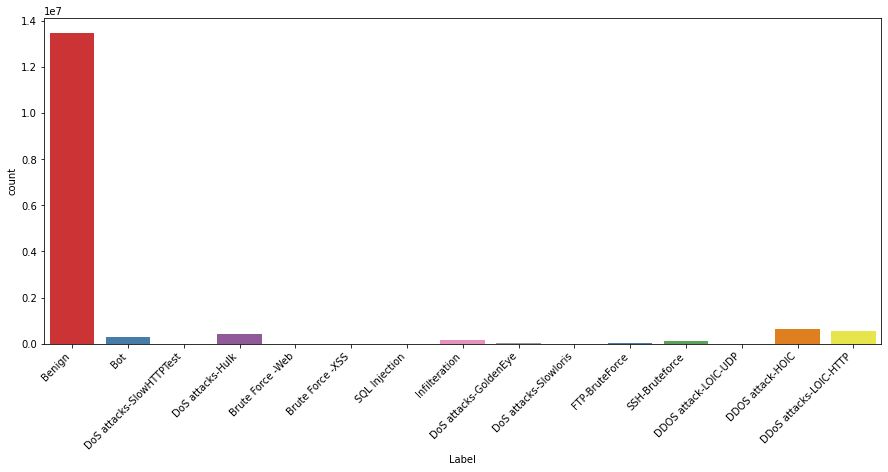

In [43]:
plt.figure(figsize=(15,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

### Data Cleaning

In [44]:
# Saving cleaned dataset.

dataset.to_csv("Dataset_clean_full_raw.csv", index=False)

In [3]:
dataset = pd.read_csv("Dataset_clean_full_raw.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15717349 entries, 0 to 15717348
Data columns (total 78 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Flow Duration      int64  
 2   Tot Fwd Pkts       int64  
 3   Tot Bwd Pkts       int64  
 4   TotLen Fwd Pkts    float64
 5   TotLen Bwd Pkts    float64
 6   Fwd Pkt Len Max    float64
 7   Fwd Pkt Len Min    float64
 8   Fwd Pkt Len Mean   float64
 9   Fwd Pkt Len Std    float64
 10  Bwd Pkt Len Max    float64
 11  Bwd Pkt Len Min    float64
 12  Bwd Pkt Len Mean   float64
 13  Bwd Pkt Len Std    float64
 14  Flow Byts/s        float64
 15  Flow Pkts/s        float64
 16  Flow IAT Mean      float64
 17  Flow IAT Std       float64
 18  Flow IAT Max       float64
 19  Flow IAT Min       float64
 20  Fwd IAT Tot        float64
 21  Fwd IAT Mean       float64
 22  Fwd IAT Std        float64
 23  Fwd IAT Max        float64
 24  Fwd IAT Min        float64
 25  Bwd IAT Tot     

In [5]:
dataset.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,141385,9,7,553.0,3773.0,202.0,0.0,61.444444,87.534438,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,281,2,1,38.0,0.0,38.0,0.0,19.000000,26.870058,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,279824,11,15,1086.0,10527.0,385.0,0.0,98.727273,129.392497,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,132,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,274016,9,13,1285.0,6141.0,517.0,0.0,142.777778,183.887722,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [6]:
# Renaming columns


In [7]:
# Removing whitespaces in column names.

col_names = [col.replace(' ', '') for col in dataset.columns]
dataset.columns = col_names
dataset.head()

,DstPort,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,FwdPktLenStd,...,FwdSegSizeMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,443,141385,9,7,553.0,3773.0,202.0,0.0,61.444444,87.534438,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,281,2,1,38.0,0.0,38.0,0.0,19.000000,26.870058,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,279824,11,15,1086.0,10527.0,385.0,0.0,98.727273,129.392497,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,132,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,274016,9,13,1285.0,6141.0,517.0,0.0,142.777778,183.887722,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [8]:

# Here we can see that 'Label' column contains some wierd characters. 

dataset["Label"].unique()

array(['Benign', 'Bot', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Hulk',
       'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection',
       'Infilteration', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'FTP-BruteForce', 'SSH-Bruteforce', 'DDOS attack-LOIC-UDP',
       'DDOS attack-HOIC', 'DDoS attacks-LOIC-HTTP'], dtype=object)

In [9]:
# This next snippet uses regular expressions to replace wierd characters with dunders.

label_names = dataset['Label'].unique()


import re

label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

label_names, len(label_names)

(['Benign',
  'Bot',
  'DoS_attacksSlowHTTPTest',
  'DoS_attacksHulk',
  'Brute_Force_Web',
  'Brute_Force_XSS',
  'SQL_Injection',
  'Infilteration',
  'DoS_attacksGoldenEye',
  'DoS_attacksSlowloris',
  'FTPBruteForce',
  'SSHBruteforce',
  'DDOS_attackLOICUDP',
  'DDOS_attackHOIC',
  'DDoS_attacksLOICHTTP'],
 15)

In [10]:
# Replacing 'Label' column values with new readable values.

labels = dataset['Label'].unique()

for i in range(0,len(label_names)):
    dataset['Label'] = dataset['Label'].replace({labels[i] : label_names[i]})
    
dataset['Label'].unique()

array(['Benign', 'Bot', 'DoS_attacksSlowHTTPTest', 'DoS_attacksHulk',
       'Brute_Force_Web', 'Brute_Force_XSS', 'SQL_Injection',
       'Infilteration', 'DoS_attacksGoldenEye', 'DoS_attacksSlowloris',
       'FTPBruteForce', 'SSHBruteforce', 'DDOS_attackLOICUDP',
       'DDOS_attackHOIC', 'DDoS_attacksLOICHTTP'], dtype=object)

In [11]:
len(dataset['Label'].unique())

15

In [12]:

# Removing NULL values

In [13]:
dataset.head()

,DstPort,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,FwdPktLenStd,...,FwdSegSizeMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,443,141385,9,7,553.0,3773.0,202.0,0.0,61.444444,87.534438,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,281,2,1,38.0,0.0,38.0,0.0,19.000000,26.870058,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,279824,11,15,1086.0,10527.0,385.0,0.0,98.727273,129.392497,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,132,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,274016,9,13,1285.0,6141.0,517.0,0.0,142.777778,183.887722,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [14]:
# Checking if there are any NULL values in the dataset.

dataset.isnull().values.any()

True

In [15]:
# Checking which column/s contain NULL values.

[col for col in dataset if dataset[col].isnull().values.any()]

['FlowByts/s']

In [16]:
# Checking how many NULL values it this column contains.

dataset['FlowByts/s'].isnull().sum()

57248

In [17]:
# Considering that only 334 rows contain NULL vlaues in the entire dataset, which makes about 0.01%, we
# can safely remove all NULL rows without spoiling the data.

57248/dataset.shape[0]*100

0.36423445200586946

In [18]:
# Removing rows that contain NULL values and checking if number of removed rows is equal to the number of null values.

before = dataset.shape

dataset.dropna(inplace=True)

after = dataset.shape

before[0] - after[0]

57248

In [19]:
dataset.isnull().any().any()

False

In [20]:
#Removing non-finite values

In [15]:
import numpy as np

In [22]:
labl = dataset['Label']
dataset = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [23]:
# Checking if all values are finite.

np.all(np.isfinite(dataset))

False

In [24]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in dataset if not np.all(np.isfinite(dataset[col]))]

nonfinite

['FlowByts/s', 'FlowPkts/s']

In [25]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowByts/s']).sum()

dataset.shape[0] - finite

35978

In [26]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(dataset['FlowPkts/s']).sum()

dataset.shape[0] - finite

35978

In [27]:
# Same as before, since there is a small number of non-finite values we can safely remove them from the dataset
# without spoiling the dataset.

# Replacing infinite values with NaN values.
dataset = dataset.replace([np.inf, -np.inf], np.nan)

In [28]:
# We can see that now we have Nan values again.

np.any(np.isnan(dataset))

True

In [29]:
# Bringing the Labels back into the dataset before deliting Nan rows.

dataset = dataset.merge(labl, how='outer', left_index=True, right_index=True)

In [30]:
# Removing new NaN values.

dataset.dropna(inplace=True)

In [32]:
dataset.shape

(15624123, 78)

In [23]:
dataset.head()

,DstPort,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,FwdPktLenStd,...,FwdSegSizeMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,443.0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684.0,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443.0,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443.0,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443.0,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [89]:
# Saving cleaned dataset.

#dataset.to_csv("Dataset_clean_and_ready.csv", index=False)

# Data Balancing

In [4]:
dataset.head()

,DstPort,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,FwdPktLenStd,...,FwdSegSizeMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,443.0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684.0,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443.0,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443.0,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443.0,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [28]:
attacks = dataset[dataset['Label']!= "Benign"]

In [29]:
benign = dataset[dataset['Label']== "Benign"]


In [30]:
attacks.shape

(2262429, 78)

In [65]:
benign.shape

(13361694, 78)

In [26]:
dataset.head()


,DstPort,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,FwdPktLenStd,...,FwdSegSizeMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,443.0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684.0,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443.0,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443.0,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443.0,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
attacks = dataset[dataset['Label']!= "Benign"]

In [6]:
attacks.shape

(2262429, 78)

In [7]:
benign = dataset[dataset['Label']== "Benign"]

In [8]:
benign.shape

(13361694, 78)

In [10]:
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(benign, 
                                 replace=True,         # sample with replacement
                                 n_samples=2262429,    # to match majority class
                                 random_state=123)    # reproducible results
 

In [12]:
df_minority_upsampled.shape

(2262429, 78)

In [13]:
dataset.shape

(15624123, 78)

In [14]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority_upsampled, attacks])

In [18]:
df_downsampled['Label'].value_counts()

Benign                     2262429
DDOS_attackHOIC             651746
DDoS_attacksLOICHTTP        576191
DoS_attacksHulk             412124
Bot                         278584
Infilteration               160572
SSHBruteforce               102782
DoS_attacksGoldenEye         41404
FTPBruteForce                19734
DoS_attacksSlowloris         10010
DoS_attacksSlowHTTPTest       6624
DDOS_attackLOICUDP            1730
Brute_Force_Web                611
Brute_Force_XSS                230
SQL_Injection                   87
Name: Label, dtype: int64

In [19]:
df_downsampled.shape

(4524858, 78)

In [21]:
df_downsampled.head()

,DstPort,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,FwdPktLenStd,...,FwdSegSizeMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
5932482,53.0,1457.0,1.0,1.0,34.0,121.0,34.0,34.0,34.000000,0.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
10928906,53.0,19128.0,1.0,1.0,52.0,112.0,52.0,52.0,52.000000,0.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
5064366,53.0,713.0,1.0,1.0,32.0,60.0,32.0,32.0,32.000000,0.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
13814495,3389.0,6949770.0,12.0,7.0,1052.0,1429.0,581.0,0.0,87.666667,169.503732,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1938950,80.0,80.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dataset['Label'].value_counts()

Benign                     2262429
DDOS_attackHOIC             651746
DDoS_attacksLOICHTTP        576191
DoS_attacksHulk             412124
Bot                         278584
Infilteration               160572
SSHBruteforce               102782
DoS_attacksGoldenEye         41404
FTPBruteForce                19734
DoS_attacksSlowloris         10010
DoS_attacksSlowHTTPTest       6624
DDOS_attackLOICUDP            1730
Brute_Force_Web                611
Brute_Force_XSS                230
SQL_Injection                   87
Name: Label, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Benign'),
  Text(1, 0, 'Bot'),
  Text(2, 0, 'DoS_attacksSlowHTTPTest'),
  Text(3, 0, 'DoS_attacksHulk'),
  Text(4, 0, 'Brute_Force_Web'),
  Text(5, 0, 'Brute_Force_XSS'),
  Text(6, 0, 'SQL_Injection'),
  Text(7, 0, 'Infilteration'),
  Text(8, 0, 'DoS_attacksGoldenEye'),
  Text(9, 0, 'DoS_attacksSlowloris'),
  Text(10, 0, 'FTPBruteForce'),
  Text(11, 0, 'SSHBruteforce'),
  Text(12, 0, 'DDOS_attackLOICUDP'),
  Text(13, 0, 'DDOS_attackHOIC'),
  Text(14, 0, 'DDoS_attacksLOICHTTP')])

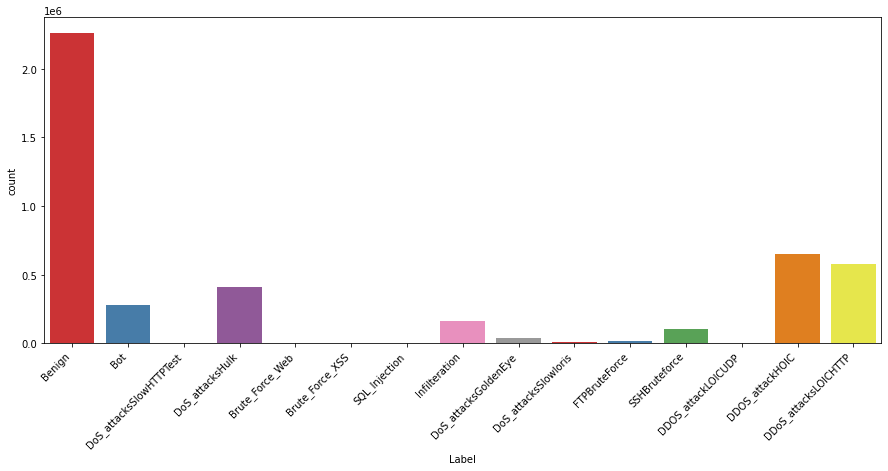

In [7]:
data = dataset['Label']
plt.figure(figsize=(15,6))
chart = sns.countplot(data, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

In [26]:
# Saving cleaned dataset.

#df_downsampled.to_csv("Dataset_clean_and_downsampled.csv", index=False)

In [3]:
# Read dataset
dataset = pd.read_csv("Dataset_clean_and_downsampled.csv")

In [4]:
dataset.head()

,DstPort,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,FwdPktLenStd,...,FwdSegSizeMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,53.0,1457.0,1.0,1.0,34.0,121.0,34.0,34.0,34.000000,0.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,53.0,19128.0,1.0,1.0,52.0,112.0,52.0,52.0,52.000000,0.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,53.0,713.0,1.0,1.0,32.0,60.0,32.0,32.0,32.000000,0.000000,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3389.0,6949770.0,12.0,7.0,1052.0,1429.0,581.0,0.0,87.666667,169.503732,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,80.0,80.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [9]:
dataset.shape

(4524858, 78)

In [10]:
# Splitting dataset into features and labels.

labels = dataset['Label']
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [11]:
features.head()

,DstPort,FlowDuration,TotFwdPkts,TotBwdPkts,TotLenFwdPkts,TotLenBwdPkts,FwdPktLenMax,FwdPktLenMin,FwdPktLenMean,FwdPktLenStd,...,FwdActDataPkts,FwdSegSizeMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,53.0,1457.0,1.0,1.0,34.0,121.0,34.0,34.0,34.000000,0.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53.0,19128.0,1.0,1.0,52.0,112.0,52.0,52.0,52.000000,0.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.0,713.0,1.0,1.0,32.0,60.0,32.0,32.0,32.000000,0.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3389.0,6949770.0,12.0,7.0,1052.0,1429.0,581.0,0.0,87.666667,169.503732,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80.0,80.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scaling the data

In [12]:
# For scaling the data, we use RobustScaler class from sklearn.

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [13]:
scaler = RobustScaler()
scaler.fit(features)

features = scaler.transform(features)

In [14]:
# Checking if scaling has been succesful.
features[0]

array([-7.39726027e-02, -1.08594247e-02, -1.00000000e+00,  0.00000000e+00,
        1.26582278e-02,  6.41711230e-02,  1.78571429e-02,  3.40000000e+01,
        3.94444444e-01,  0.00000000e+00,  6.68859649e-02,  1.21000000e+02,
        5.11503067e-01,  0.00000000e+00,  7.56335664e+00,  5.91192161e-01,
       -4.78274641e-02,  0.00000000e+00, -1.46239257e-02,  2.69858319e-01,
       -5.37465270e-03, -2.20503260e-02,  0.00000000e+00, -8.21529055e-03,
       -2.38582962e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.62500000e+00,  0.00000000e+00,
        4.21586612e-01,  5.33656891e+00,  3.40000000e+01,  6.41711230e-02,
        1.43631436e-01,  1.11293466e-01,  2.67993098e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        2.41869919e-01,  

### Label encoding

In [16]:

from sklearn.preprocessing import LabelEncoder

In [17]:
LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

In [18]:
# Labels have been replaced with integers.

np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Splitting the data

In [21]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2,random_state=1)


features_train.shape, labels_train.shape ,features_test.shape , labels_test.shape

((3619886, 77), (3619886,), (904972, 77), (904972,))

In [22]:
 features_train,  features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.25, random_state=1)

features_train.shape, labels_train.shape , features_val.shape ,labels_val.shape

((2714914, 77), (2714914,), (904972, 77), (904972,))

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
np.random.seed(0)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=1)
x_train.shape ,x_test.shape , y_train.shape ,y_test.shape

((3619886, 77), (904972, 77), (3619886,), (904972,))

In [73]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [74]:
X_train.shape

(3619886, 77, 1)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# DNN Models

In [25]:
import datetime

import os

In [26]:
log_dir = os.path.join(
    "train_logs",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)

# TF callback that sets up TensorBoard with training logs.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# TF callback that stops training when best value of validationi loss function is reached. It also
# restores weights from the best training iteration.
eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [41]:
dnn1= Sequential()
dnn1.add(Dense(128, activation='relu', input_shape=(features_train.shape[1],)))
dnn1.add(Dropout(0.1))
dnn1.add(Dense(15, activation='softmax'))
dnn1.summary()
dnn1.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               9984      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 15)                1935      
Total params: 11,919
Trainable params: 11,919
Non-trainable params: 0
_________________________________________________________________


In [42]:

dnn1.fit(features_train,labels_train,epochs=50,batch_size=128,validation_data=(features_val,labels_val),callbacks=[tensorboard_callback, eary_stop_callback])


Epoch 1/50
21211/21211 [==============================] - 48s 2ms/step - loss: 14260.8637 - accuracy: 0.8738 - val_loss: 0.7657 - val_accuracy: 0.9023
Epoch 2/50
21211/21211 [==============================] - 44s 2ms/step - loss: 135.6666 - accuracy: 0.8974 - val_loss: 0.2708 - val_accuracy: 0.9021
Epoch 3/50
21211/21211 [==============================] - 45s 2ms/step - loss: 0.2840 - accuracy: 0.9020 - val_loss: 0.2612 - val_accuracy: 0.9034
Epoch 4/50
21211/21211 [==============================] - 45s 2ms/step - loss: 0.2702 - accuracy: 0.9029 - val_loss: 0.9133 - val_accuracy: 0.9034
Epoch 5/50
21211/21211 [==============================] - 48s 2ms/step - loss: 0.2850 - accuracy: 0.9032 - val_loss: 0.2552 - val_accuracy: 0.9038
Epoch 6/50
21211/21211 [==============================] - 46s 2ms/step - loss: 0.2720 - accuracy: 0.9030 - val_loss: 2.6020 - val_accuracy: 0.9035
Epoch 7/50
21211/21211 [==============================] - 46s 2ms/step - loss: 0.2845 - accuracy: 0.9034 - val_l

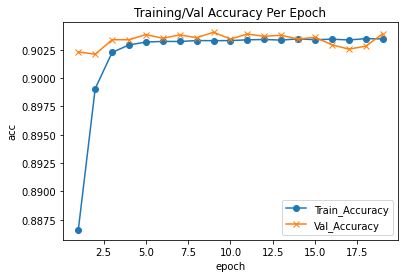

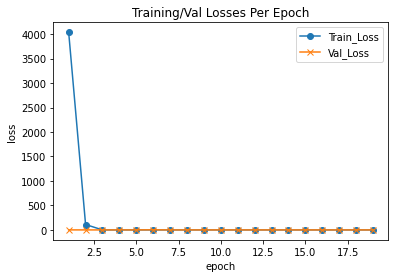

In [43]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + dnn1.history.history["accuracy"], 'o-')
ax.plot([None] + dnn1.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + dnn1.history.history["loss"], 'o-')
ax.plot([None] + dnn1.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [44]:
# Evaluating model accuracy.
dnn1.evaluate(features_test, labels_test, verbose=2)

28281/28281 - 22s - loss: 0.2509 - accuracy: 0.9041


[0.25090306997299194, 0.9040578007698059]

In [45]:
# this function has evaluation metrics
def report(prediction, y_true):
    print('        ----------Classification Report Of Classes-------------')
    print(classification_report(y_true,prediction))
    print('\n        ----------Validation Data------------------')
    print('Accuarcy:',accuracy_score(y_true, prediction)* 100)
    print('Precision: {:,.4f} %'.format(precision_score(y_true, prediction, average='weighted') * 100))
    print('Recall-score: {:,.4f}'.format(recall_score(y_true, prediction, average='weighted') * 100))
    print('F1-score: {:,.4f}'.format(f1_score(y_true, prediction, average='weighted') * 100))

In [46]:
predict = np.argmax(dnn1.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))

In [47]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.84      0.99      0.91    452600
           1       1.00      1.00      1.00     55595
           2       0.94      0.38      0.54       128
           3       0.97      0.67      0.79        42
           4       1.00      1.00      1.00    130014
           5       0.00      0.00      0.00       328
           6       1.00      0.56      0.72    115506
           7       1.00      0.51      0.67      8302
           8       1.00      0.99      1.00     82196
           9       0.00      0.00      0.00      1415
          10       0.96      0.28      0.43      1997
          11       0.73      1.00      0.85      3920
          12       0.76      0.19      0.31     32307
          13       0.67      0.15      0.25        13
          14       1.00      1.00      1.00     20609

    accuracy                           0.90    904972
   macro avg    

In [117]:
# Saving the model.

dnn1.save('saved_models/DNN1_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.h5')

In [105]:
dnn2= Sequential()
dnn2.add(Dense(128, activation='relu', input_shape=(features_train.shape[1],)))
dnn2.add(Dropout(0.1))
dnn2.add(Dense(256, activation='relu'))
dnn2.add(Dropout(0.1))
dnn2.add(Dense(15, activation='softmax'))
dnn1.summary()
dnn2.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               9984      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 15)                1935      
Total params: 11,919
Trainable params: 11,919
Non-trainable params: 0
_________________________________________________________________


In [106]:
dnn2.fit(features_train,labels_train,epochs=50,batch_size=128,validation_data=(features_val,labels_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/50
21211/21211 [==============================] - 81s 4ms/step - loss: 0.2943 - accuracy: 0.8863 - val_loss: 0.2505 - val_accuracy: 0.8960
Epoch 2/50
21211/21211 [==============================] - 77s 4ms/step - loss: 0.2564 - accuracy: 0.8963 - val_loss: 0.2488 - val_accuracy: 0.8958
Epoch 3/50
21211/21211 [==============================] - 80s 4ms/step - loss: 0.2564 - accuracy: 0.8976 - val_loss: 0.2489 - val_accuracy: 0.8960
Epoch 4/50
21211/21211 [==============================] - 80s 4ms/step - loss: 0.2574 - accuracy: 0.8956 - val_loss: 0.2524 - val_accuracy: 0.8975
Epoch 5/50
21211/21211 [==============================] - 79s 4ms/step - loss: 0.2556 - accuracy: 0.8969 - val_loss: 0.2517 - val_accuracy: 0.8910
Epoch 6/50
21211/21211 [==============================] - 81s 4ms/step - loss: 0.2548 - accuracy: 0.8988 - val_loss: 0.2540 - val_accuracy: 0.8859
Epoch 7/50
21211/21211 [==============================] - 80s 4ms/step - loss: 0.2583 - accuracy: 0.8973 - val_loss: 0

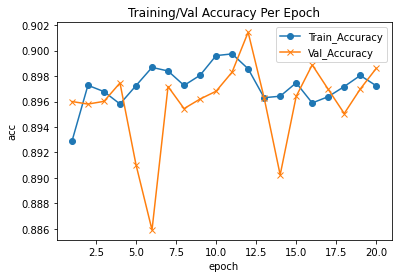

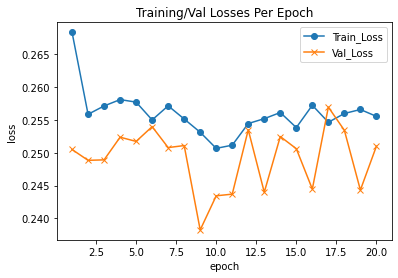

In [108]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + dnn2.history.history["accuracy"], 'o-')
ax.plot([None] + dnn2.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + dnn2.history.history["loss"], 'o-')
ax.plot([None] + dnn2.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [109]:
# Evaluating model accuracy.
dnn2.evaluate(features_test, labels_test, verbose=2)


28281/28281 - 24s - loss: 0.2442 - accuracy: 0.8969


[0.24418418109416962, 0.8968708515167236]

In [110]:
predict = np.argmax(dnn2.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))

In [111]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.83      0.99      0.91    452600
           1       1.00      1.00      1.00     55595
           2       0.33      0.01      0.02       128
           3       0.52      0.69      0.59        42
           4       1.00      1.00      1.00    130014
           5       0.68      1.00      0.81       328
           6       1.00      0.51      0.67    115506
           7       0.98      0.51      0.67      8302
           8       1.00      0.99      1.00     82196
           9       0.00      0.00      0.00      1415
          10       0.93      0.25      0.39      1997
          11       0.73      1.00      0.84      3920
          12       0.74      0.19      0.30     32307
          13       0.00      0.00      0.00        13
          14       1.00      1.00      1.00     20609

    accuracy                           0.90    904972
   macro avg    

In [116]:
# Saving the model.

dnn2.save('saved_models/DNN2_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.h5')

In [55]:
dnn3= Sequential()
dnn3.add(Dense(128, activation='relu', input_shape=(features_train.shape[1],)))
dnn3.add(Dropout(0.1))
dnn3.add(Dense(256, activation='relu'))
dnn3.add(Dropout(0.1))
dnn3.add(Dense(512, activation='relu'))
dnn3.add(Dropout(0.1))
dnn3.add(Dense(15, activation = 'softmax'))
dnn3.summary()

dnn3.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               9984      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 23)              

In [56]:
dnn3.fit(features_train,labels_train,epochs=50,batch_size=256,validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])


Epoch 1/50
5303/5303 [==============================] - 79s 15ms/step - loss: 0.3456 - accuracy: 0.8729 - val_loss: 0.2466 - val_accuracy: 0.8942
Epoch 2/50
5303/5303 [==============================] - 79s 15ms/step - loss: 0.2489 - accuracy: 0.8976 - val_loss: 0.2421 - val_accuracy: 0.9109
Epoch 3/50
5303/5303 [==============================] - 77s 14ms/step - loss: 0.2424 - accuracy: 0.9024 - val_loss: 0.2345 - val_accuracy: 0.9040
Epoch 4/50
5303/5303 [==============================] - 75s 14ms/step - loss: 0.2396 - accuracy: 0.9034 - val_loss: 0.2382 - val_accuracy: 0.9034
Epoch 5/50
5303/5303 [==============================] - 75s 14ms/step - loss: 0.2366 - accuracy: 0.9039 - val_loss: 0.2353 - val_accuracy: 0.9053
Epoch 6/50
5303/5303 [==============================] - 76s 14ms/step - loss: 0.2378 - accuracy: 0.9039 - val_loss: 0.2350 - val_accuracy: 0.9043
Epoch 7/50
5303/5303 [==============================] - 78s 15ms/step - loss: 0.2378 - accuracy: 0.9038 - val_loss: 0.2345 -

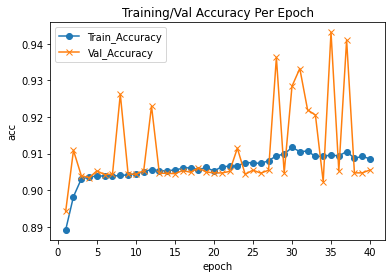

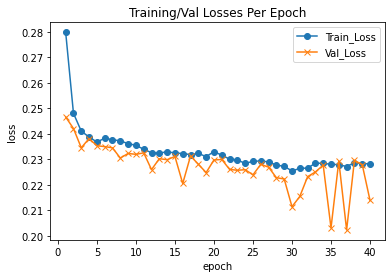

In [57]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + dnn3.history.history["accuracy"], 'o-')
ax.plot([None] + dnn3.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + dnn3.history.history["loss"], 'o-')
ax.plot([None] + dnn3.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [58]:
predict = np.argmax(dnn3.predict(features_test),axis=1)

a = np.unique(predict)
b = np.unique(labels_test)
c = list(set(a) | set(b))

In [59]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94    452600
           1       1.00      1.00      1.00     55595
           2       0.98      0.38      0.54       128
           3       0.97      0.69      0.81        42
           4       1.00      1.00      1.00    130014
           5       0.68      1.00      0.81       328
           6       0.77      1.00      0.87    115506
           7       1.00      0.51      0.67      8302
           8       1.00      1.00      1.00     82196
           9       0.00      0.00      0.00      1415
          10       0.73      0.28      0.41      1997
          11       0.74      1.00      0.85      3920
          12       0.75      0.20      0.32     32307
          13       1.00      0.08      0.14        13
          14       1.00      1.00      1.00     20609

    accuracy                           0.93    904972
   macro avg    

In [115]:
# Saving the model.

dnn3.save('saved_models/DNN3_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.h5')

# CNN Models

In [65]:
y_train= to_categorical(labels_train)
y_test= to_categorical(labels_test)
y_val= to_categorical(labels_val)


In [66]:
# reshape input to be [samples, time steps, features]

# reshape input to be [samples, time steps, features]
X_train = np.reshape(features_train, (features_train.shape[0],features_train.shape[1],1))
X_test = np.reshape(features_test, (features_test.shape[0],features_test.shape[1],1))
X_val = np.reshape(features_val, (features_val.shape[0],features_val.shape[1],1))
X_train.shape , X_test.shape ,X_val.shape

((2714914, 77, 1), (904972, 77, 1), (904972, 77, 1))

In [69]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)

# create model
cnn1 = Sequential()
cnn1.add(Conv1D(64, 3,input_shape=(77, 1) ))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(MaxPooling1D(pool_size=2))
cnn1.add(Dropout(0.3))

cnn1.add(Flatten())
cnn1.add(Dense(64, input_dim=77, kernel_initializer=hidden_initializer))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(Dense(32))
cnn1.add(LeakyReLU(alpha=0.1))

cnn1.add(Dense(15, activation='sigmoid'))

cnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 75, 64)            256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 75, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 4800)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                307264    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                9

In [70]:
cnn1.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
cnn1.fit(X_train, y_train, epochs=50, batch_size=1024, validation_data=(X_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/50
2652/2652 [==============================] - 255s 96ms/step - loss: 1655.8644 - accuracy: 0.7579 - val_loss: 99.3057 - val_accuracy: 0.9018
Epoch 2/50
2652/2652 [==============================] - 241s 91ms/step - loss: 72.3142 - accuracy: 0.7500 - val_loss: 10.1316 - val_accuracy: 0.8837
Epoch 3/50
2652/2652 [==============================] - 236s 89ms/step - loss: 7.6289 - accuracy: 0.7084 - val_loss: 2.4370 - val_accuracy: 0.9088
Epoch 4/50
2652/2652 [==============================] - 237s 89ms/step - loss: 3.1592 - accuracy: 0.6726 - val_loss: 14.6704 - val_accuracy: 0.6900
Epoch 5/50
2652/2652 [==============================] - 229s 86ms/step - loss: 3.0161 - accuracy: 0.6395 - val_loss: 0.7540 - val_accuracy: 0.7653
Epoch 6/50
2652/2652 [==============================] - 229s 86ms/step - loss: 15.7002 - accuracy: 0.6391 - val_loss: 7.6085 - val_accuracy: 0.8666
Epoch 7/50
2652/2652 [==============================] - 229s 86ms/step - loss: 15.9803 - accuracy: 0.7667 - va

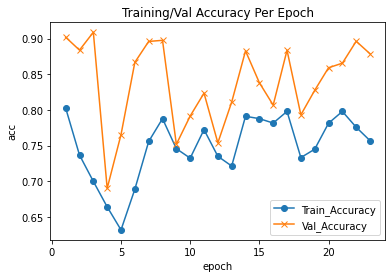

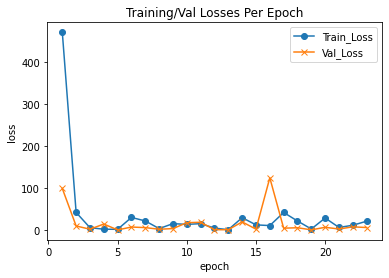

In [71]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + cnn1.history.history["accuracy"], 'o-')
ax.plot([None] + cnn1.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + cnn1.history.history["loss"], 'o-')
ax.plot([None] + cnn1.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [72]:
predict = np.argmax(cnn1.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [73]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.84    452600
           1       0.00      0.00      0.00     55595
           2       0.00      0.00      0.00       128
           3       0.00      0.00      0.00        42
           4       0.94      0.96      0.95    130014
           5       0.00      0.00      0.00       328
           6       0.71      0.92      0.80    115506
           7       0.00      0.00      0.00      8302
           8       1.00      0.93      0.96     82196
           9       0.00      0.00      0.00      1415
          10       1.00      0.49      0.65      1997
          11       0.00      0.00      0.00      3920
          12       0.66      0.06      0.11     32307
          13       0.00      0.00      0.00        13
          14       0.99      0.91      0.95     20609

    accuracy                           0.82    904972
   macro avg    

In [74]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn2 = Sequential()
cnn2.add(Conv1D(64, 3, input_shape=(77, 1)))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(Dropout(0.3))

cnn2.add(Conv1D(32, 1))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(MaxPooling1D(pool_size=2))
cnn2.add(Dropout(0.3))

cnn2.add(Flatten())
cnn2.add(Dense(64, input_dim=25, kernel_initializer=hidden_initializer))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(Dense(32))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(Dense(15, activation='sigmoid'))

cnn2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 75, 64)            256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 75, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 73, 32)            6176      
_________________________________________________________________
flatten (Flatten)            (None, 2336)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                149568    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)                0

In [75]:
cnn2.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
cnn2.fit(X_train, y_train, epochs=50, batch_size=1024, validation_data=(X_val,y_val),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/50
2652/2652 [==============================] - 367s 138ms/step - loss: 461.3857 - accuracy: 0.6549 - val_loss: 7.1596 - val_accuracy: 0.8353
Epoch 2/50
2652/2652 [==============================] - 349s 132ms/step - loss: 64.4727 - accuracy: 0.7753 - val_loss: 5.2617 - val_accuracy: 0.8688
Epoch 3/50
2652/2652 [==============================] - 345s 130ms/step - loss: 2.7259 - accuracy: 0.8220 - val_loss: 2.7876 - val_accuracy: 0.8119
Epoch 4/50
2652/2652 [==============================] - 344s 130ms/step - loss: 1.6296 - accuracy: 0.7579 - val_loss: 0.2993 - val_accuracy: 0.8960
Epoch 5/50
2652/2652 [==============================] - 344s 130ms/step - loss: 0.3086 - accuracy: 0.7521 - val_loss: 0.2234 - val_accuracy: 0.7943
Epoch 6/50
2652/2652 [==============================] - 345s 130ms/step - loss: 0.3915 - accuracy: 0.7571 - val_loss: 0.3839 - val_accuracy: 0.8715
Epoch 7/50
2652/2652 [==============================] - 346s 131ms/step - loss: 0.4121 - accuracy: 0.8223 - v

In [ ]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + cnn2.history.history["accuracy"], 'o-')
ax.plot([None] + cnn2.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + cnn2.history.history["loss"], 'o-')
ax.plot([None] + cnn2.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [77]:
predict = np.argmax(cnn2.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [78]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93    452600
           1       0.97      0.98      0.98     55595
           2       0.00      0.00      0.00       128
           3       0.00      0.00      0.00        42
           4       0.98      1.00      0.99    130014
           5       0.72      0.99      0.83       328
           6       0.85      0.98      0.91    115506
           7       0.00      0.00      0.00      8302
           8       0.92      0.98      0.95     82196
           9       0.00      0.00      0.00      1415
          10       0.83      0.70      0.76      1997
          11       0.59      0.91      0.72      3920
          12       0.67      0.07      0.12     32307
          13       0.00      0.00      0.00        13
          14       0.98      0.96      0.97     20609

    accuracy                           0.92    904972
   macro avg    

In [80]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn3 = Sequential()
cnn3.add(Conv1D(64, 3, input_shape=(77, 1)))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Dropout(0.3))

cnn3.add(Conv1D(32, 1))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Dropout(0.4))

cnn3.add(Conv1D(32, 1))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())
cnn3.add(Dense(64, input_dim=25, kernel_initializer=hidden_initializer))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(Dense(32))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(Dense(15, activation='sigmoid'))

cnn3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 75, 64)            256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 75, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 75, 32)            2080      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 75, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 75, 32)            1

In [81]:
cnn3.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
cnn3.fit(X_train, y_train, epochs=50, batch_size=1024, validation_data=(X_test,y_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/50
2652/2652 [==============================] - 571s 215ms/step - loss: 531.2428 - accuracy: 0.6540 - val_loss: 1.6387 - val_accuracy: 0.8715
Epoch 2/50
2652/2652 [==============================] - 530s 200ms/step - loss: 2.4606 - accuracy: 0.8527 - val_loss: 0.3573 - val_accuracy: 0.9072
Epoch 3/50
2652/2652 [==============================] - 534s 201ms/step - loss: 0.7354 - accuracy: 0.8825 - val_loss: 0.1238 - val_accuracy: 0.9130
Epoch 4/50
2652/2652 [==============================] - 523s 197ms/step - loss: 0.2351 - accuracy: 0.9015 - val_loss: 1.2846 - val_accuracy: 0.9126
Epoch 5/50
2652/2652 [==============================] - 525s 198ms/step - loss: 0.0938 - accuracy: 0.9138 - val_loss: 1.1484 - val_accuracy: 0.9370
Epoch 6/50
2652/2652 [==============================] - 516s 195ms/step - loss: 0.1182 - accuracy: 0.9223 - val_loss: 0.6268 - val_accuracy: 0.9267
Epoch 7/50
2652/2652 [==============================] - 515s 194ms/step - loss: 0.5200 - accuracy: 0.8981 - va

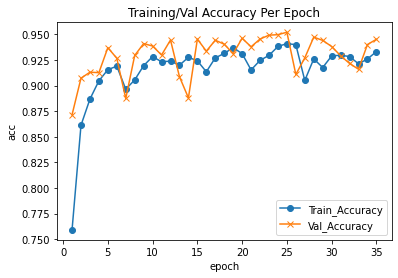

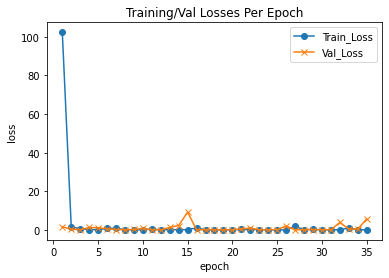

In [82]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + cnn3.history.history["accuracy"], 'o-')
ax.plot([None] + cnn3.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + cnn3.history.history["loss"], 'o-')
ax.plot([None] + cnn3.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [83]:
predict = np.argmax(cnn3.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [84]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96    452600
           1       0.98      1.00      0.99     55595
           2       0.00      0.00      0.00       128
           3       0.00      0.00      0.00        42
           4       1.00      1.00      1.00    130014
           5       0.72      0.99      0.83       328
           6       0.96      0.99      0.97    115506
           7       0.86      0.43      0.58      8302
           8       0.99      0.99      0.99     82196
           9       0.00      0.00      0.00      1415
          10       0.99      0.68      0.80      1997
          11       0.73      1.00      0.85      3920
          12       0.75      0.16      0.27     32307
          13       0.00      0.00      0.00        13
          14       0.99      1.00      0.99     20609

    accuracy                           0.95    904972
   macro avg    

# RNN Models

In [85]:
X_train = np.array(features_train).reshape(features_train.shape[0], features_train.shape[1], 1)
X_test = np.array(features_test).reshape(features_test.shape[0], features_test.shape[1], 1)
X_val = np.array(features_val).reshape(features_val.shape[0], features_val.shape[1], 1)
X_train.shape , X_test.shape , X_val.shape

((2714914, 77, 1), (904972, 77, 1), (904972, 77, 1))

In [86]:
#hyperparameters

# Initialising the RNN
rnn3 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 16,activation='relu', return_sequences = True,  input_shape = (77,1)))
rnn3.add(Dropout(0.1))

# Adding a second RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 16,activation='relu', return_sequences = True))
rnn3.add(Dropout(0.1))

# Adding a third RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 16,activation='relu', return_sequences = True))
rnn3.add(Dropout(0.1))

# Adding the output layer
rnn3.add(Flatten())
rnn3.add(Dense(32, input_dim=25, kernel_initializer=hidden_initializer))
rnn3.add(LeakyReLU(alpha=0.1))
rnn3.add(Dense(16))
rnn3.add(LeakyReLU(alpha=0.1))
rnn3.add(Dense(units = 15, activation='sigmoid'))

rnn3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 77, 16)            288       
_________________________________________________________________
dropout_3 (Dropout)          (None, 77, 16)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 77, 16)            528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 77, 16)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 77, 16)            528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 77, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1232)             

In [88]:
rnn3.compile(loss = "binary_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn3.fit(X_train, y_train, epochs=50, batch_size=1024, validation_data=(X_test,y_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/50
2652/2652 [==============================] - 679s 255ms/step - loss: 0.8991 - accuracy: 0.7383 - val_loss: 2.1860 - val_accuracy: 0.9322
Epoch 2/50
2652/2652 [==============================] - 672s 253ms/step - loss: 0.3486 - accuracy: 0.9153 - val_loss: 0.0780 - val_accuracy: 0.9063
Epoch 3/50
2652/2652 [==============================] - 656s 247ms/step - loss: 0.0702 - accuracy: 0.9235 - val_loss: 0.0282 - val_accuracy: 0.9448
Epoch 4/50
2652/2652 [==============================] - 648s 244ms/step - loss: 0.1533 - accuracy: 0.9317 - val_loss: 0.0788 - val_accuracy: 0.9344
Epoch 5/50
2652/2652 [==============================] - 647s 244ms/step - loss: 0.0717 - accuracy: 0.9396 - val_loss: 0.0308 - val_accuracy: 0.9546
Epoch 6/50
2652/2652 [==============================] - 645s 243ms/step - loss: 0.0744 - accuracy: 0.9466 - val_loss: 0.5822 - val_accuracy: 0.9570
Epoch 7/50
2652/2652 [==============================] - 647s 244ms/step - loss: 0.0314 - accuracy: 0.9542 - val_

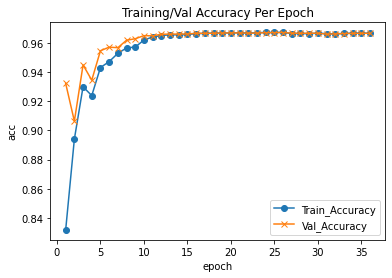

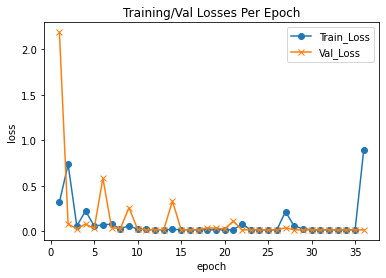

In [89]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + rnn3.history.history["accuracy"], 'o-')
ax.plot([None] + rnn3.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + rnn3.history.history["loss"], 'o-')
ax.plot([None] + rnn3.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [90]:
predict = np.argmax(rnn3.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [91]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    452600
           1       1.00      1.00      1.00     55595
           2       0.74      0.39      0.51       128
           3       1.00      0.38      0.55        42
           4       1.00      1.00      1.00    130014
           5       0.72      0.99      0.83       328
           6       1.00      1.00      1.00    115506
           7       1.00      1.00      1.00      8302
           8       1.00      1.00      1.00     82196
           9       0.97      0.04      0.08      1415
          10       0.99      0.99      0.99      1997
          11       0.74      1.00      0.85      3920
          12       0.76      0.21      0.33     32307
          13       0.00      0.00      0.00        13
          14       1.00      1.00      1.00     20609

    accuracy                           0.97    904972
   macro avg    

In [92]:
#hyperparameters

# Initialising the RNN
rnn2 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn2.add(SimpleRNN(units = 32,activation='relu', return_sequences = True,  input_shape = (77,1)))
rnn2.add(Dropout(0.1))

# Adding a second RNN layer and some Dropout regularisation
rnn2.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn2.add(Dropout(0.1))

# Adding the output layer
rnn2.add(Flatten())
rnn2.add(Dense(32, input_dim=25, kernel_initializer=hidden_initializer))
rnn2.add(LeakyReLU(alpha=0.1))
rnn2.add(Dense(16))
rnn2.add(LeakyReLU(alpha=0.1))
rnn2.add(Dense(units = 15, activation='sigmoid'))

rnn2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 77, 32)            1088      
_________________________________________________________________
dropout_6 (Dropout)          (None, 77, 32)            0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 77, 32)            2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 77, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2464)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                78880     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32)               

In [95]:
rnn2.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn2.fit(X_train, y_train, epochs=50, batch_size=1024, validation_data=(X_test,y_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/50
2652/2652 [==============================] - 566s 212ms/step - loss: 104.5660 - accuracy: 0.7229 - val_loss: 1.0090 - val_accuracy: 0.9505
Epoch 2/50
2652/2652 [==============================] - 548s 207ms/step - loss: 1.1266 - accuracy: 0.9408 - val_loss: 0.2005 - val_accuracy: 0.9599
Epoch 3/50
2652/2652 [==============================] - 546s 206ms/step - loss: 0.4277 - accuracy: 0.9532 - val_loss: 0.1369 - val_accuracy: 0.9639
Epoch 4/50
2652/2652 [==============================] - 546s 206ms/step - loss: 0.1707 - accuracy: 0.9614 - val_loss: 0.1274 - val_accuracy: 0.9654
Epoch 5/50
2652/2652 [==============================] - 545s 205ms/step - loss: 4.7145 - accuracy: 0.9641 - val_loss: 0.7098 - val_accuracy: 0.9433
Epoch 6/50
2652/2652 [==============================] - 540s 204ms/step - loss: 0.6688 - accuracy: 0.9492 - val_loss: 0.1684 - val_accuracy: 0.9638
Epoch 7/50
2652/2652 [==============================] - 542s 204ms/step - loss: 0.2138 - accuracy: 0.9601 - va

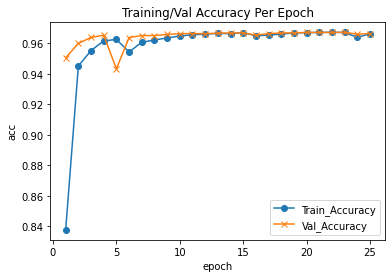

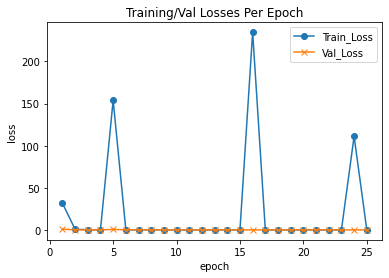

In [96]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + rnn2.history.history["accuracy"], 'o-')
ax.plot([None] + rnn2.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + rnn2.history.history["loss"], 'o-')
ax.plot([None] + rnn2.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [97]:
predict = np.argmax(rnn2.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [98]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    452600
           1       1.00      1.00      1.00     55595
           2       1.00      0.20      0.34       128
           3       0.00      0.38      0.00        42
           4       1.00      1.00      1.00    130014
           5       0.03      1.00      0.05       328
           6       0.99      0.40      0.58    115506
           7       1.00      1.00      1.00      8302
           8       1.00      1.00      1.00     82196
           9       0.37      0.00      0.01      1415
          10       0.99      0.97      0.98      1997
          11       0.73      1.00      0.84      3920
          12       0.77      0.20      0.32     32307
          13       0.00      0.00      0.00        13
          14       1.00      1.00      1.00     20609

    accuracy                           0.89    904972
   macro avg    

In [99]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)
# Initialising the RNN
rnn1 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn1.add(SimpleRNN(units = 32,activation='relu', return_sequences = True,  input_shape = (77,1)))
rnn1.add(Dropout(0.1))

# Adding the output layer
rnn1.add(Flatten())
rnn1.add(Dense(32, input_dim=25, kernel_initializer=hidden_initializer))
rnn1.add(LeakyReLU(alpha=0.1))
rnn1.add(Dense(16))
rnn1.add(LeakyReLU(alpha=0.1))
rnn1.add(Dense(units = 15, activation='sigmoid'))

rnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 77, 32)            1088      
_________________________________________________________________
dropout (Dropout)            (None, 77, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2464)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                78880     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16)                0

In [100]:
rnn1.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn1.fit(X_train, y_train, epochs=50, batch_size=1024, validation_data=(X_test,y_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/50
2652/2652 [==============================] - 288s 108ms/step - loss: 3101.8011 - accuracy: 0.7905 - val_loss: 61.1945 - val_accuracy: 0.8755
Epoch 2/50
2652/2652 [==============================] - 293s 110ms/step - loss: 98.9803 - accuracy: 0.8797 - val_loss: 57.2722 - val_accuracy: 0.8742
Epoch 3/50
2652/2652 [==============================] - 281s 106ms/step - loss: 43.9712 - accuracy: 0.8850 - val_loss: 25.1404 - val_accuracy: 0.9199
Epoch 4/50
2652/2652 [==============================] - 291s 110ms/step - loss: 8.5331 - accuracy: 0.9075 - val_loss: 39.8419 - val_accuracy: 0.7764
Epoch 5/50
2652/2652 [==============================] - 273s 103ms/step - loss: 14.5772 - accuracy: 0.8876 - val_loss: 0.2416 - val_accuracy: 0.9386
Epoch 6/50
2652/2652 [==============================] - 267s 101ms/step - loss: 0.2276 - accuracy: 0.9434 - val_loss: 0.1517 - val_accuracy: 0.9598
Epoch 7/50
2652/2652 [==============================] - 267s 101ms/step - loss: 0.1540 - accuracy: 0.9

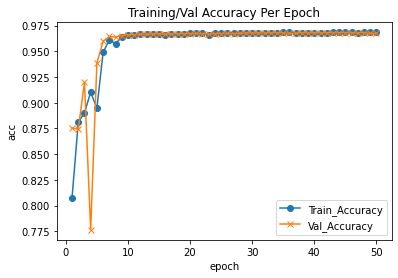

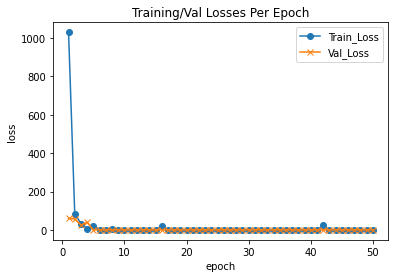

In [102]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + rnn1.history.history["accuracy"], 'o-')
ax.plot([None] + rnn1.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + rnn1.history.history["loss"], 'o-')
ax.plot([None] + rnn1.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [103]:
predict = np.argmax(rnn1.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [104]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.75      0.99      0.86    452600
           1       0.73      0.51      0.60     55595
           2       0.76      0.24      0.37       128
           3       0.00      0.76      0.00        42
           4       1.00      0.21      0.34    130014
           5       0.70      0.99      0.82       328
           6       0.99      0.50      0.66    115506
           7       0.82      0.86      0.84      8302
           8       1.00      0.96      0.98     82196
           9       0.00      0.00      0.00      1415
          10       0.99      1.00      0.99      1997
          11       0.73      1.00      0.85      3920
          12       0.77      0.23      0.35     32307
          13       0.11      0.23      0.15        13
          14       1.00      1.00      1.00     20609

    accuracy                           0.75    904972
   macro avg    

# Trying different configurations

In [119]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)
# Initialising the RNN
rnn1v2 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn1v2.add(SimpleRNN(units = 64,activation='relu', return_sequences = True,  input_shape = (77,1)))
rnn1v2.add(Dropout(0.1))

# Adding the output layer
rnn1v2.add(Flatten())
rnn1v2.add(Dense(64, input_dim=25, kernel_initializer=hidden_initializer))
rnn1v2.add(LeakyReLU(alpha=0.1))
rnn1v2.add(Dense(32))
rnn1v2.add(LeakyReLU(alpha=0.1))
rnn1v2.add(Dense(units = 15, activation='sigmoid'))

rnn1v2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 77, 64)            4224      
_________________________________________________________________
dropout (Dropout)            (None, 77, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 4928)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                315456    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0

In [123]:
rnn1v2.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn1v2.fit(X_train, y_train, epochs=30, batch_size= 512, validation_data=(X_test,y_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/30
5303/5303 [==============================] - 641s 121ms/step - loss: 1382.7164 - accuracy: 0.8730 - val_loss: 57.5199 - val_accuracy: 0.8983
Epoch 2/30
5303/5303 [==============================] - 637s 120ms/step - loss: 88.9323 - accuracy: 0.9070 - val_loss: 32.9393 - val_accuracy: 0.8857
Epoch 3/30
5303/5303 [==============================] - 647s 122ms/step - loss: 28.8461 - accuracy: 0.9059 - val_loss: 13.4314 - val_accuracy: 0.8973
Epoch 4/30
5303/5303 [==============================] - 647s 122ms/step - loss: 5.4733 - accuracy: 0.9126 - val_loss: 0.2600 - val_accuracy: 0.9253
Epoch 5/30
5303/5303 [==============================] - 637s 120ms/step - loss: 0.8572 - accuracy: 0.9402 - val_loss: 0.1190 - val_accuracy: 0.9660
Epoch 6/30
5303/5303 [==============================] - 642s 121ms/step - loss: 0.2156 - accuracy: 0.9659 - val_loss: 0.1174 - val_accuracy: 0.9657
Epoch 7/30
5303/5303 [==============================] - 647s 122ms/step - loss: 0.2602 - accuracy: 0.965

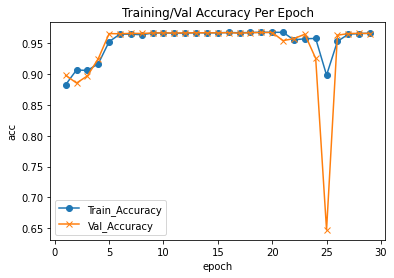

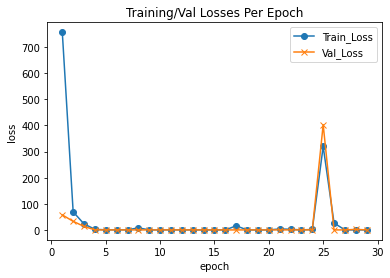

In [124]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + rnn1v2.history.history["accuracy"], 'o-')
ax.plot([None] + rnn1v2.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + rnn1v2.history.history["loss"], 'o-')
ax.plot([None] + rnn1v2.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [128]:
predict = np.argmax(rnn1v2.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [129]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    452600
           1       1.00      0.98      0.99     55595
           2       0.94      0.40      0.56       128
           3       0.95      0.50      0.66        42
           4       1.00      1.00      1.00    130014
           5       0.18      1.00      0.31       328
           6       1.00      0.50      0.67    115506
           7       1.00      1.00      1.00      8302
           8       1.00      0.96      0.98     82196
           9       0.00      0.00      0.00      1415
          10       1.00      0.98      0.99      1997
          11       0.73      1.00      0.85      3920
          12       0.72      0.08      0.14     32307
          13       0.00      0.00      0.00        13
          14       1.00      0.56      0.72     20609

    accuracy                           0.89    904972
   macro avg    

In [132]:
#hyperparameters

# Initialising the RNN
rnn2v2 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn2v2.add(SimpleRNN(units = 64,activation='relu', return_sequences = True,  input_shape = (77,1)))
rnn2v2.add(Dropout(0.1))

# Adding a second RNN layer and some Dropout regularisation
rnn2v2.add(SimpleRNN(units = 64,activation='relu', return_sequences = True))
rnn2v2.add(Dropout(0.1))

# Adding the output layer
rnn2v2.add(Flatten())
rnn2v2.add(Dense(64, input_dim=77, kernel_initializer=hidden_initializer))
rnn2v2.add(LeakyReLU(alpha=0.1))
rnn2v2.add(Dense(32))
rnn2v2.add(LeakyReLU(alpha=0.1))
rnn2v2.add(Dense(units = 15, activation='sigmoid'))

rnn2v2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 77, 64)            4224      
_________________________________________________________________
dropout_5 (Dropout)          (None, 77, 64)            0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 77, 64)            8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 77, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4928)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                315456    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64)               

In [134]:
rnn2v2.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn2v2.fit(X_train, y_train, epochs=25, batch_size= 1024, validation_data=(X_test,y_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/25
2652/2652 [==============================] - 1134s 426ms/step - loss: 297.9792 - accuracy: 0.8697 - val_loss: 6.3392 - val_accuracy: 0.9565
Epoch 2/25
2652/2652 [==============================] - 1131s 427ms/step - loss: 1.5369 - accuracy: 0.9466 - val_loss: 0.1606 - val_accuracy: 0.9642
Epoch 3/25
2652/2652 [==============================] - 1224s 462ms/step - loss: 0.2466 - accuracy: 0.9617 - val_loss: 78.4513 - val_accuracy: 0.9653
Epoch 4/25
2652/2652 [==============================] - 1133s 427ms/step - loss: 0.1510 - accuracy: 0.9650 - val_loss: 103.6119 - val_accuracy: 0.9296
Epoch 5/25
2652/2652 [==============================] - 1103s 416ms/step - loss: 1.9043 - accuracy: 0.9633 - val_loss: 0.1247 - val_accuracy: 0.9648
Epoch 6/25
2652/2652 [==============================] - 1096s 413ms/step - loss: 0.2142 - accuracy: 0.9658 - val_loss: 0.1125 - val_accuracy: 0.9669
Epoch 7/25
2652/2652 [==============================] - 1099s 414ms/step - loss: 0.1187 - accuracy: 0

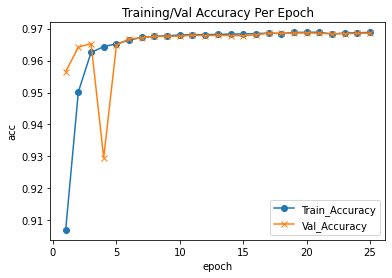

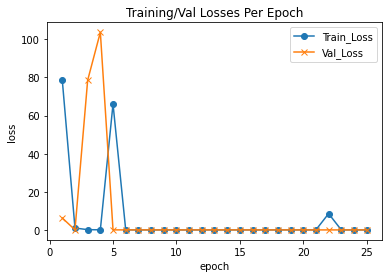

In [135]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + rnn2v2.history.history["accuracy"], 'o-')
ax.plot([None] + rnn2v2.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + rnn2v2.history.history["loss"], 'o-')
ax.plot([None] + rnn2v2.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [138]:
predict = np.argmax(rnn2v2.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [139]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96    452600
           1       1.00      0.90      0.95     55595
           2       0.84      0.64      0.73       128
           3       0.94      0.76      0.84        42
           4       1.00      1.00      1.00    130014
           5       0.77      0.93      0.84       328
           6       1.00      1.00      1.00    115506
           7       1.00      1.00      1.00      8302
           8       1.00      1.00      1.00     82196
           9       0.65      0.36      0.46      1415
          10       1.00      1.00      1.00      1997
          11       0.80      0.93      0.86      3920
          12       0.76      0.24      0.36     32307
          13       0.50      0.15      0.24        13
          14       1.00      1.00      1.00     20609

    accuracy                           0.96    904972
   macro avg    

In [152]:
#hyperparameters

# Initialising the RNN
rnn3v2 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn3v2.add(SimpleRNN(units = 64,activation='relu', return_sequences = True,  input_shape = (77,1)))
rnn3v2.add(Dropout(0.1))

# Adding a second RNN layer and some Dropout regularisation
rnn3v2.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn3v2.add(Dropout(0.1))

# Adding a third RNN layer and some Dropout regularisation
rnn3v2.add(SimpleRNN(units = 16,activation='relu', return_sequences = True))
rnn3v2.add(Dropout(0.1))

# Adding the output layer
rnn3v2.add(Flatten())
rnn3v2.add(Dense(64, input_dim=77, kernel_initializer=hidden_initializer))
rnn3v2.add(LeakyReLU(alpha=0.1))
rnn3v2.add(Dense(32))
rnn3v2.add(LeakyReLU(alpha=0.1))
rnn3v2.add(Dense(units = 15, activation='sigmoid'))

rnn3v2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_16 (SimpleRNN)    (None, 77, 64)            4224      
_________________________________________________________________
dropout_16 (Dropout)         (None, 77, 64)            0         
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 77, 32)            3104      
_________________________________________________________________
dropout_17 (Dropout)         (None, 77, 32)            0         
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, 77, 16)            784       
_________________________________________________________________
dropout_18 (Dropout)         (None, 77, 16)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1232)             

In [153]:
rnn3v2.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
rnn3v2.fit(X_train, y_train, epochs=20, batch_size= 4096, validation_data=(X_test,y_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/20
663/663 [==============================] - 962s 1s/step - loss: 5312.7934 - accuracy: 0.6649 - val_loss: 88.8211 - val_accuracy: 0.8400
Epoch 2/20
663/663 [==============================] - 970s 1s/step - loss: 173.8617 - accuracy: 0.8798 - val_loss: 17.2408 - val_accuracy: 0.8888
Epoch 3/20
663/663 [==============================] - 953s 1s/step - loss: 42.7287 - accuracy: 0.8895 - val_loss: 4.6382 - val_accuracy: 0.9138
Epoch 4/20
663/663 [==============================] - 949s 1s/step - loss: 12.6328 - accuracy: 0.9011 - val_loss: 1.6020 - val_accuracy: 0.9081
Epoch 5/20
663/663 [==============================] - 959s 1s/step - loss: 3.7021 - accuracy: 0.9165 - val_loss: 0.5552 - val_accuracy: 0.8964
Epoch 6/20
663/663 [==============================] - 959s 1s/step - loss: 1.9492 - accuracy: 0.9264 - val_loss: 0.4659 - val_accuracy: 0.9489
Epoch 7/20
663/663 [==============================] - 960s 1s/step - loss: 1.6391 - accuracy: 0.9321 - val_loss: 0.5400 - val_accurac

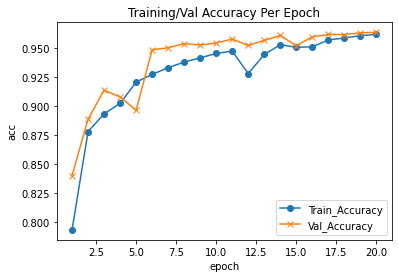

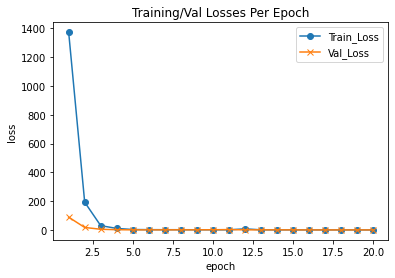

In [154]:
# plotting loss graphs w.r.t each epoch
f, ax = plt.subplots()
ax.plot([None] + rnn3v2.history.history["accuracy"], 'o-')
ax.plot([None] + rnn3v2.history.history["val_accuracy"], 'x-')

ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax.set_title('Training/Val Accuracy Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()

f, ax = plt.subplots()
ax.plot([None] + rnn3v2.history.history["loss"], 'o-')
ax.plot([None] + rnn3v2.history.history["val_loss"], 'x-')

ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax.set_title('Training/Val Losses Per Epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.show()

In [155]:
predict = np.argmax(rnn3v2.predict(X_test),axis=1)

a = np.unique(predict)
b = np.unique(y_test)
c = list(set(a) | set(b))

In [156]:
report(predict,labels_test)

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    452600
           1       1.00      1.00      1.00     55595
           2       0.00      0.00      0.00       128
           3       0.00      0.00      0.00        42
           4       1.00      1.00      1.00    130014
           5       0.50      0.00      0.01       328
           6       0.99      1.00      1.00    115506
           7       0.97      0.98      0.98      8302
           8       1.00      1.00      1.00     82196
           9       0.00      0.00      0.00      1415
          10       0.92      0.24      0.38      1997
          11       0.73      1.00      0.84      3920
          12       0.73      0.18      0.29     32307
          13       0.00      0.00      0.00        13
          14       1.00      1.00      1.00     20609

    accuracy                           0.96    904972
   macro avg    

In [159]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn3v2 = Sequential()
cnn3v2.add(Conv1D(64, 3, input_shape=(77, 1)))
cnn3v2.add(LeakyReLU(alpha=0.1))
cnn3v2.add(Dropout(0.3))

cnn3v2.add(Conv1D(32, 1))
cnn3v2.add(LeakyReLU(alpha=0.1))
cnn3v2.add(Dropout(0.4))

cnn3v2.add(Conv1D(32, 1))
cnn3v2.add(LeakyReLU(alpha=0.1))
cnn3v2.add(Dropout(0.4))

cnn3v2.add(Flatten())
cnn3v2.add(Dense(64, input_dim=77, kernel_initializer=hidden_initializer))
cnn3v2.add(LeakyReLU(alpha=0.1))
cnn3v2.add(Dense(32))
cnn3v2.add(LeakyReLU(alpha=0.1))
cnn3v2.add(Dense(15, activation='sigmoid'))

cnn3v2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 75, 64)            256       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 75, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 75, 32)            2080      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 75, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 75, 32)            1

In [160]:
cnn3v2.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
cnn3v2.fit(X_train, y_train, epochs=20, batch_size=1024, validation_data=(X_test,y_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/20
2652/2652 [==============================] - 507s 191ms/step - loss: 2198.3173 - accuracy: 0.7150 - val_loss: 10.3386 - val_accuracy: 0.8748
Epoch 2/20
2652/2652 [==============================] - 493s 186ms/step - loss: 16.4260 - accuracy: 0.8781 - val_loss: 2.0952 - val_accuracy: 0.8927
Epoch 3/20
2652/2652 [==============================] - 488s 184ms/step - loss: 7.4455 - accuracy: 0.8924 - val_loss: 2.5215 - val_accuracy: 0.9112
Epoch 4/20
2652/2652 [==============================] - 503s 190ms/step - loss: 4.0959 - accuracy: 0.8786 - val_loss: 0.6504 - val_accuracy: 0.8996
Epoch 5/20
2652/2652 [==============================] - 504s 190ms/step - loss: 1.0116 - accuracy: 0.8981 - val_loss: 0.2749 - val_accuracy: 0.9353
Epoch 6/20
2652/2652 [==============================] - 497s 187ms/step - loss: 0.5887 - accuracy: 0.9165 - val_loss: 0.3559 - val_accuracy: 0.9227
Epoch 7/20
2652/2652 [==============================] - 529s 199ms/step - loss: 1.4490 - accuracy: 0.9201 -